# Geometries Object, the first step of Geospatial in Python

In [1]:
from shapely.geometry import Point, LineString, Polygon

In [2]:
# Creating a Point, a point represent a single location or place, x and y dimension or x,y,z
# I'm very near in the symbolic place of Kaolack region in Senegal, which is 'Great mosque of Medina Baye', let's create a point of it.
great_medina = Point(14.16113524342423, -16.062587070112155)
print(great_medina)

POINT (14.16113524342423 -16.06258707011215)


In [4]:
# The second most famous place in Kaolack region is 'lycee valdiodio Ndiaye', a famous high school in the region
lycee_valdiodio = Point(14.15963413033422, -16.071952275661204)
print(lycee_valdiodio)

POINT (14.15963413033422 -16.0719522756612)


In [5]:
# One of the symbolic places in Kaolack is 'Taiba Niassene'
taiba = Point(13.755276438260571, -15.737540108973315)
print(taiba)

POINT (13.75527643826057 -15.73754010897331)


In [6]:
# The small airport of Kaolack
airport = Point(14.147813976444436, -16.051430344976072)
print(airport)

POINT (14.14781397644444 -16.05143034497607)


In [8]:
print(type(airport), type(taiba), type(great_medina), type(lycee_valdiodio))

<class 'shapely.geometry.point.Point'> <class 'shapely.geometry.point.Point'> <class 'shapely.geometry.point.Point'> <class 'shapely.geometry.point.Point'>


### Extracting the Coordinate of geometry Point

In [15]:
# Extracting the coordinate to be able to calculate the distance between points
coordinate_great_medina = great_medina.coords
coordinate_lycee_valdiodio = lycee_valdiodio.coords
coordinate_taiba = taiba.coords
coordinate_airport = airport.coords
print(coordinate_great_medina);
print(coordinate_lycee_valdiodio);
print(coordinate_taiba);
print(coordinate_airport)

In [16]:
# Getting the x and y coordinates (we have explained previousely that a single point location is composed with 2 dimentional x and y or 3 dimentionals x,y,z)
# Getting the x and y coordinates of all above symbolic places we've mentionned already
xy_great_medina = coordinate_great_medina.xy
xy_lycee_valdiodio = coordinate_lycee_valdiodio.xy
xy_taiba = coordinate_taiba.xy
xy_airport = coordinate_airport.xy
print(xy_great_medina);
print(xy_lycee_valdiodio);
print(xy_taiba);
print(xy_airport)

(array('d', [14.16113524342423]), array('d', [-16.062587070112155]))
(array('d', [14.15963413033422]), array('d', [-16.071952275661204]))
(array('d', [13.755276438260571]), array('d', [-15.737540108973315]))
(array('d', [14.147813976444436]), array('d', [-16.051430344976072]))


In [22]:
# Extract x and y of every place, i will just focus on great_medina and lycee_valdiodio
x_great_medina, y_great_medina = coordinate_great_medina.xy
x_lycee_valdiodio, y_lycee_valdiodio = coordinate_lycee_valdiodio.xy
print(x_great_medina);
print(y_great_medina);
print(x_lycee_valdiodio);
print(y_lycee_valdiodio)

array('d', [14.16113524342423])
array('d', [-16.062587070112155])
array('d', [14.15963413033422])
array('d', [-16.071952275661204])


 The x represent the latitude, the horizontal line going from north to south, the y represents the longitude,, the vertical line, going from east to west (+180 east, -180 west). 

### Calculate Distance between Points

In [20]:
# calculate the distance between great_medina and lycee_valdiodio
distance_great_medina_and_lycee_valdiodio = great_medina.distance(lycee_valdiodio)
print(distance_great_medina_and_lycee_valdiodio)

0.009484746463924658


In [21]:
print("Distance between Great mosque of Medina Baye and Lycee Valdiodio is {0:.2f} decimal degrees".format(distance_great_medina_and_lycee_valdiodio))

Distance between Great mosque of Medina Baye and Lycee Valdiodio is 0.01 decimal degrees


Using google map, when we create a line distance between the two location, we got this:\ Total distance: 912.88 m (2,995.00 ft)



It's very important to know that shapely library calculate distance between two points in Euclidean distance, means like distance in a plane. We have to calculate distance between two points on sphere when we are in the surface of Earth

In [68]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(14.16113524342423)
lon1 = radians(-16.062587070112155)
lat2 = radians(14.15963413033422)
lon2 = radians(-16.071952275661204)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
dist = R * c

print("Result:", dist)


Result: 1.023745908203328


In [69]:
great_medina.coords.xy

(array('d', [14.16113524342423]), array('d', [-16.062587070112155]))

In [65]:
lycee_valdiodio.coords.xy

(array('d', [14.15963413033422]), array('d', [-16.071952275661204]))

# Creating LineString 
When we regroup two seperate points together in a line that's also a LineString. For example, when we regroup great_medina coordinate and lycee_valdiodio coordinates. We will regroup three points in the next code to form a linestring

In [79]:
print(great_medina);
print(lycee_valdiodio);
print(airport)

POINT (14.16113524342423 -16.06258707011215)
POINT (14.15963413033422 -16.0719522756612)
POINT (14.14781397644444 -16.05143034497607)


In [97]:
type(lycee_valdiodio.coords)

shapely.coords.CoordinateSequence

In [98]:
from shapely.geometry import Point, LineString

lines = LineString([great_medina, lycee_valdiodio, airport]).wkt
print(lines)

LINESTRING (14.16113524342423 -16.06258707011215, 14.15963413033422 -16.0719522756612, 14.14781397644444 -16.05143034497607)


In [105]:
lines_tuples = LineString([(14.16113524342423, -16.06258707011215), (14.15963413033422, -16.0719522756612), (14.14781397644444, -16.05143034497607)])
print(lines_tuples)

LINESTRING (14.16113524342423 -16.06258707011215, 14.15963413033422 -16.0719522756612, 14.14781397644444 -16.05143034497607)


We will use our lincestring to do the following:\
    - To extract the coordinates or the length of a LineString (line),\ 
    - Calculate the centroid of the line, \
    - Create points along the line at specific distance, \
    - Calculate the closest distance from a line to specified Point and simplify the geometry.
    



In [112]:
# Extracting the coordinates of our linestring named 'lines'
lines_tuples.xy

(array('d', [14.16113524342423, 14.15963413033422, 14.14781397644444]),
 array('d', [-16.06258707011215, -16.0719522756612, -16.05143034497607]))

In [113]:
lines

'LINESTRING (14.16113524342423 -16.06258707011215, 14.15963413033422 -16.0719522756612, 14.14781397644444 -16.05143034497607)'

In [118]:
# Txtracting the total of our tree location points,
for i in lines_tuples.coords:
    print(i)

(14.16113524342423, -16.06258707011215)
(14.15963413033422, -16.0719522756612)
(14.14781397644444, -16.05143034497607)


In [121]:
# The Alternative code of above extraction
all_lines = [i for i in lines_tuples.coords]
print(all_lines[0]); # Extracting a 
print(all_lines)

(14.16113524342423, -16.06258707011215)
[(14.16113524342423, -16.06258707011215), (14.15963413033422, -16.0719522756612), (14.14781397644444, -16.05143034497607)]


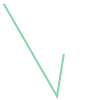

In [125]:
lines_tuples

In [ ]:
# Get the lenght of the lines_tuple

In [138]:
lenght_lines_tuples = lines_tuples.length
print("Length of our line: {0:.2f}".format(lenght_lines_tuples))

Length of our line: 0.03


In [128]:
# Get the centroid of the line
centroid_lines_tuples = lines_tuples.centroid
print(centroid_lines_tuples)

POINT (14.15562877056682 -16.06328653440982)


In [139]:
lenght_lines_tuples

0.033167349298567565

In [142]:
# Checking the closest distance between the linestring and point
lines_tuples.project(great_medina)

3.5079370846056706e-15

In [147]:
# Calculate the closest distance of great_medina to the linestring,
closest_distance = great_medina.distance(lines_tuples)
closest_distance

5.622738603069307e-16

In [145]:
lines_tuples.contains(great_medina)

False

In [156]:
# Find the closest point, another method
pol_ext = LineString(lines_tuples.coords)
d = pol_ext.project(great_medina)
p = pol_ext.interpolate(d)
closest_point_coords = list(p.coords)[0]
print(closest_point_coords)

(14.16113524342423, -16.062587070112155)


## Polygon

In [159]:
# Create a Polygon from the coordinates
poly = Polygon([(14.16113524342423, -16.06258707011215), (14.15963413033422, -16.0719522756612), (14.14781397644444, -16.05143034497607)])
print(poly)

POLYGON ((14.16113524342423 -16.06258707011215, 14.15963413033422 -16.0719522756612, 14.14781397644444 -16.05143034497607, 14.16113524342423 -16.06258707011215))


In [160]:

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [great_medina, lycee_valdiodio, airport]])
print(poly2)

POLYGON ((14.16113524342423 -16.06258707011215, 14.15963413033422 -16.0719522756612, 14.14781397644444 -16.05143034497607, 14.16113524342423 -16.06258707011215))


In [161]:

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

In [162]:
print(poly_type);
print(poly_type2)

Polygon
<class 'shapely.geometry.polygon.Polygon'>


Polygon can bave a double parentheses, this is because polygon can have a holes inside of it, that why polygon can have interior and exterior coordinates

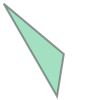

In [163]:
# Extract the shape of our polygon
poly

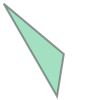

In [164]:
poly2

In [165]:
poly.area

7.075195479145349e-05

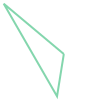

In [168]:
poly.boundary

In [179]:
poly.bounds

(14.14781397644444, -16.0719522756612, 14.16113524342423, -16.05143034497607)

Conclusion:\
    The first part of geospatial is to know the geometry types and attributes, point, linestring, polygon and so on. Identifying your own place and create a line to other places near to you can be a fun, you can calculate distances and more.